In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv ('heart_cleveland_upload.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


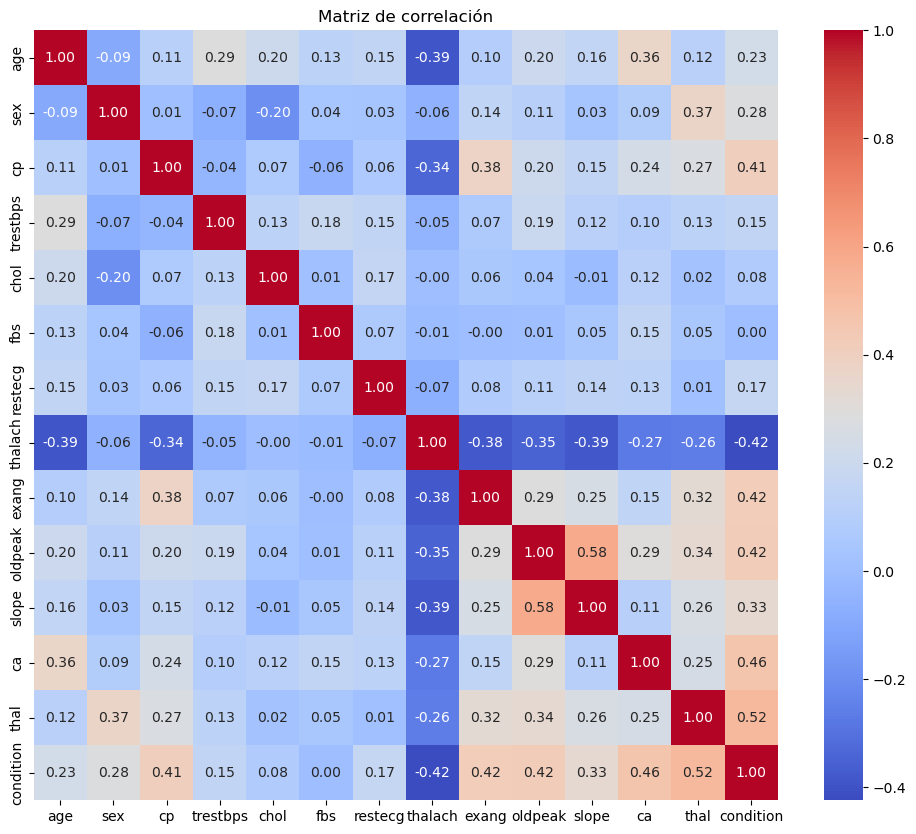

In [37]:

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

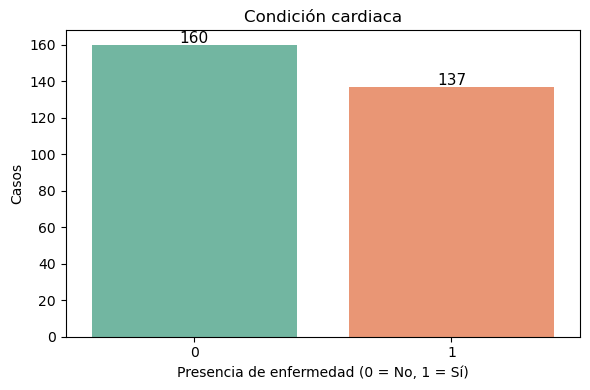

In [39]:
df['condition'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='condition', hue='condition', data=df, palette='Set2', legend=False)
plt.title('Condición cardiaca')
plt.xlabel('Presencia de enfermedad (0 = No, 1 = Sí)')
plt.ylabel('Casos')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            f'{height:.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

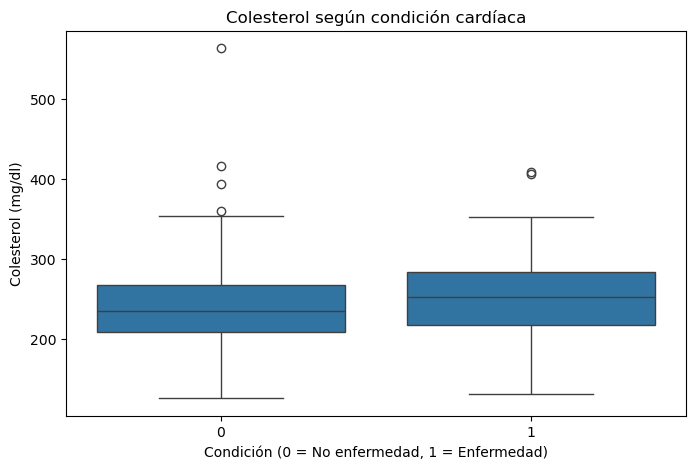

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='chol', data=df)
plt.title('Colesterol según condición cardíaca')
plt.xlabel('Condición (0 = No enfermedad, 1 = Enfermedad)')
plt.ylabel('Colesterol (mg/dl)')
plt.show()

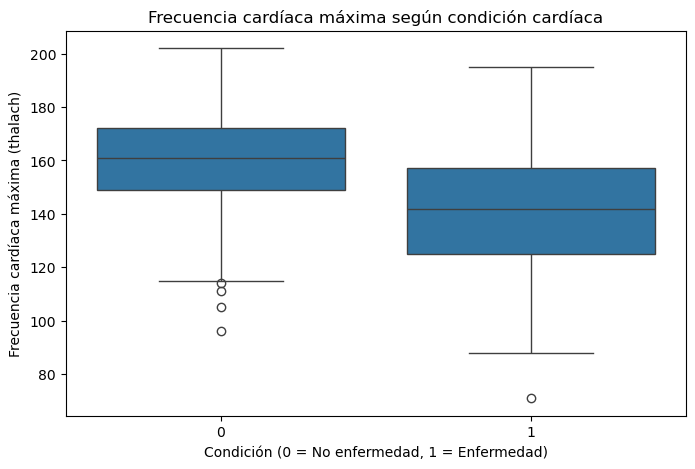

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='thalach', data=df)
plt.title('Frecuencia cardíaca máxima según condición cardíaca')
plt.xlabel('Condición (0 = No enfermedad, 1 = Enfermedad)')
plt.ylabel('Frecuencia cardíaca máxima (thalach)')
plt.show()

In [71]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [53]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [57]:
df_modelo = df.copy()


In [59]:
variables_categorias = ['cp', 'restecg', 'slope', 'thal']

In [63]:
df_modelo = pd.get_dummies(df_modelo, columns=variables_categorias, drop_first=True)


In [65]:
X = df_modelo.drop('condition', axis=1)
y = df_modelo['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [91]:
log_reg = LogisticRegression (max_iter=1000)

param_grid = { 'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear'] }       

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

modelo_f = grid_search.best_estimator_

print("Mejores hiperparámetros econtrados:")
print(grid_search.best_params_)

Mejores hiperparámetros econtrados:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [93]:
y_pred = modelo_f.predict(X_test_scaled)

print("Evaluación del modelo:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

print("Reporte")
print(classification_report(y_test, y_pred))



Evaluación del modelo:
Accuracy: 0.7666666666666667
Precisión: 0.75
Recall: 0.75
F1-Score: 0.75
Reporte
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



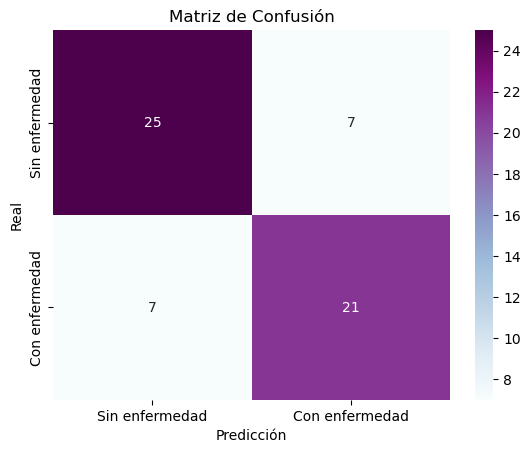

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=['Sin enfermedad', 'Con enfermedad'], yticklabels=['Sin enfermedad', 'Con enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()